# ODEs Demo: Bifurcations in a System With Real, Distinct Eigenvalues

In [7]:
# import all the packages we need
import numpy as np
import matplotlib.pyplot as plt

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
# Update 07/18/22: got retina working with updates thanks to 
# https://stackoverflow.com/questions/54312924/what-is-matplotlibs-retina-display-mode
%matplotlib inline
%config InlineBackend.figure_format='retina'

# settings stuff for the plots
# define all plot parameters + ensure axis labels all look nice. 
# Lots of this stuff is purely optional. 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Problem Statement

Let $\alpha \in (0,\infty)$ be a real, strictly positive parameter. We consider the system

$$ \mathbf{x}'(t) = \begin{pmatrix} -1 & -1 \\ -\alpha & -1 \end{pmatrix} \mathbf{x}(t). $$

This example is adapted from Problem 7.5.31 in Boyce/DiPrima ed.10. We are interested in how solutions to this system behave as we vary the parameter $\alpha$: this is accomplished by plotting the direction field of the ODE for various values of $\alpha$. We shall see a marked change in stability properties after $\alpha$ passes a certain critical "bifurcation value". 

## Preliminary Analysis

Before plotting the direction field, it's extremely helpful to do some preliminary pen-and-paper work and find the general solution of our system. By a theorem covered in lectures, finding the general solution to a constant-coefficient ODE system is as difficult as diagonalizing the coefficient matrix. So, our first step in investigating the system is to find the eigenvalues and eigenvectors of the matrix 

$$ A = \begin{pmatrix} -1 & -1 \\ -\alpha & -1 \end{pmatrix} . $$

A linear algebra computation shows that the eigenvalues of $A$ are (check this!)
$$ \lambda_{\pm} = -1\pm \sqrt{\alpha}. $$
For corresponding eigenvectors, we can take (again, check this!)
$$ \mathbf{v}_{+} = \begin{pmatrix} 1 \\ -\sqrt{\alpha} \end{pmatrix} \quad \text{and} \quad \mathbf{v}_{-} = \begin{pmatrix} 1 \\ \sqrt{\alpha} \end{pmatrix}. $$
That is, 
$$ A\mathbf{v}_{\pm} = \lambda_{\pm}\mathbf{v}_{\pm}. $$
Thus $A$ has real and distinct eigenvalues, with corresponding eigenvectors spanning the entirety of $\mathbb{R}^2$. 

By the aforementioned theorem covered in lectures,then, the general solution to our system takes the form 
$$ \mathbf{x}(t) = C_{+}\mathbf{v}_{+}e^{\lambda_{+}t} + C_{-}\mathbf{v}_{-}e^{\lambda_{-}t}, \quad C_{\pm}\in \mathbb{R}.$$
More explicitly, 
$$ \mathbf{x}(t) = C_{+}\mathbf{v}_{+}e^{\left(-1+ \sqrt{\alpha}\right)t} + C_{-}\mathbf{v}_{-}e^{\left(-1- \sqrt{\alpha}\right)t}, \quad C_{\pm}\in \mathbb{R}.$$


Staring at this general solution gives us lots of great information on the long-time behaviour of our system. Since $\alpha>0$ we have $-1-\sqrt{\alpha}<0$. Therefore, the projection of $\mathbf{x}(t)$ lying along $\mathbf{v}_{-}$ always becomes very small as $t\rightarrow \infty$. In other words, the "minus-eigenvalue part" of any solution to our system is asymptotically negligible. In particular, this implies that the long-time behaviour of our solution is controlled by the "plus-eigenvalue part". 

How does the "plus-eigenvalue part" change as we vary $\alpha$? There are three possibilities: 

a) $0<\alpha<1$: in this case $\lambda_{+}<0$, so the entire solution $\mathbf{x}(t)$ decays to the zero vector (the unique equilibrium of our system) as $t\rightarrow \infty$ regardless of $C_{\pm}$. This means $\mathbf{0}$ is a "stable node" for our system when $\alpha\in (0,1)$. 

b) $\alpha =1$: now, $\lambda_{+}=0$, so we have a whole line of equilibria consisting of $\mathrm{span}\left(\mathbf{v}_{+}\right)$!

c) $\alpha >1$: now, $\lambda_{+}>1$, so as long as $C_{+}\neq 0$, the magnitude of $\mathbf{x}(t)$ grows without bound as $t\rightarrow \infty$. Of course, if $C_{+}=0$, then our $\mathbf{x}(t)$ always lies in $\mathrm{span}\left(\mathbf{v}_{-}\right)$ and therefore decays to zero asymptotically. Since the equilbrium $\mathbf{0}$ is stable with respect to perturbations in one direction and unstable with respect to perturbations in another direction, $\mathbf{0}$ is called a "saddle point" equilibrium (a special type of unstable equilibrium). 

In particular, we identify $\alpha=1$ as the critical bifurcation value, above or below which we see a marked change in the stability of the equilibrium $\mathbf{0}$. 

## Plotting Direction Fields

Now, let's see all this theoretical discussion brought to life by drawing some example direction fields for our matrix. We start by picking our particular $\alpha$:

In [50]:
alpha = 2.

To plot the direction field for a different $\alpha$, simply change the above box and run all the code below with no changes. I recommend trying $\alpha=0.5, 1, 2$. 

Next, we need to define how big a region in the $xy$ we want to plot, and how many arrows we want to include. 

In [51]:
xmax = 8. 
ymax = xmax
samples_per_axis = 12 # number of sample points per axis

# create mesh grid of data points where we sample direction field/RHS of ODE
x,y = np.meshgrid(np.linspace(-xmax,xmax,samples_per_axis),np.linspace(-ymax,ymax,samples_per_axis))

We can now actually define the direction field for our problem. If we define $\mathbf{x}(t) = (x(t), y(t))^{\mathrm{T}}$, it helps to write out the system explicitly as 
$$ x'(t) = -\phantom{\alpha}x(t)-y(t), $$
$$ y'(t) = -\alpha x(t) - y(t). $$
Then, the right-hand side of our ODE is the direction vector field
$$ \begin{pmatrix} u(x,y) \\ v(x,y) \end{pmatrix} = \begin{pmatrix} -\phantom{\alpha}x-y \\ -\alpha x-y \end{pmatrix}.$$

In [52]:
# define direction field sampled at mesh grid of data points
u = -x-y
v = -alpha*x-y

Now, we get to the actual plotting. Most of the code below is just there to make sure the final picture looks nice, so don't worry about understanding all of it. NOTE: you will need to run this twice to get the font and sizing to appear correct and pretty-looking. 

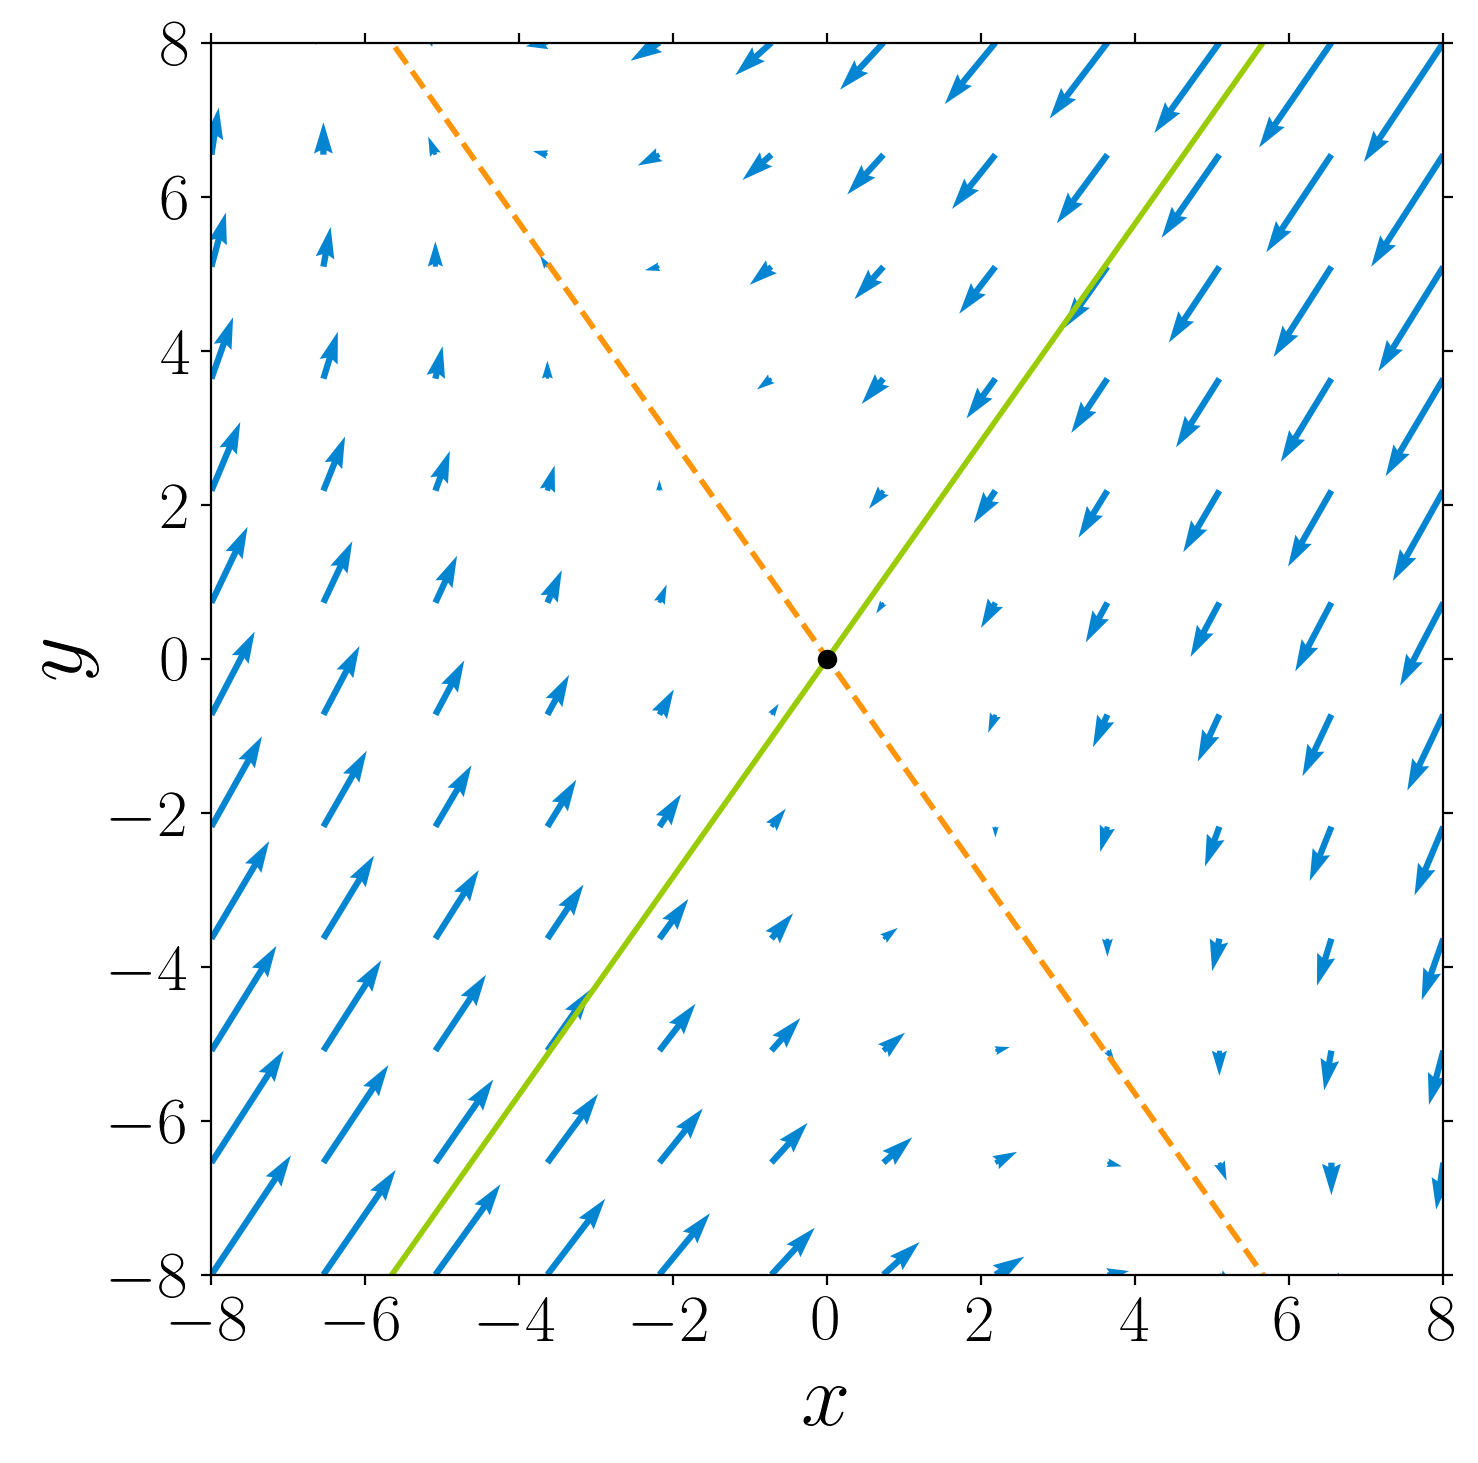

In [53]:
fig, ax = plt.subplots()

textcolor = 'k'

plt.xlim([-xmax, xmax])
plt.ylim([-ymax,ymax])

plt.xlabel(r"$x$", fontsize=32, color = textcolor)
plt.ylabel(r"$y$", fontsize=32, color = textcolor)

plt.tick_params(axis='x', which='both', top='off', color = textcolor)
plt.xticks(fontsize=24, rotation=0, color = textcolor)
plt.tick_params(axis='y', which='both', right='off', color = textcolor)
plt.yticks(fontsize=24, rotation=0, color = textcolor)

# sketch span of each eigenvector
xdata= np.linspace(-xmax,xmax,samples_per_axis)
vplus = -np.sqrt(alpha)*xdata
vminus = np.sqrt(alpha)*xdata

plt.plot(xdata, vplus, color='xkcd:tangerine', linewidth='2', linestyle='dashed')
plt.plot(xdata, vminus, color='xkcd:slime green', linewidth='2', linestyle='solid')

# plot the zero equilibrium
plt.plot(0., 0.,'ko',)

# sketch arrows of ODE's direction field. To make the picture look really nice, sometimes I take
# away the smaller arrows by masking (following soln of stackoverflow question 48782677). 
# Applying the mask is completely optional and has no effect on the math. 

if alpha != 1:
    mask = np.logical_or(np.abs(u) >= 1.5, np.abs(v) >=1.5)
else:
    mask = range(0,samples_per_axis)
    
plt.quiver(x[mask],y[mask],u[mask],v[mask], color='xkcd:cerulean', linewidth=3)

# adjust figure aspect ratio and size for maximum clarity
ax.set_aspect(1)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams["axes.edgecolor"] = 'k'

# finally, show the plot
plt.show()

In the above figure, the blue arrows represent the vector field $(u,v)^{\mathrm{T}}$, the green solid line represents $\mathrm{span}\left(\mathbf{v}_{-}\right)$, and the orange dashed line represents $\mathrm{span}\left(\mathbf{v}_{+}\right)$.

Regardless of the value of $\alpha$, we see that the orange dashed line eventually attracts all arrows not lying along the solid green line: this is a visual illustration of our earlier discussion on the "minus-eigenvalue part" of any solution to our system becoming asymptotically negligible. Also, as we change $\alpha$, we can see the transition from $\mathbf{0}$ being a stable node to a saddle point very dramatically. I encourage you to save some figures (modify the code to do this automatically... watch out for the font label colours :) ) of your favourite $\alpha$-values to visually tell the story of the pen-and-paper bifurcation discussion we underwent earlier. 